In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [3]:
game_records = pd.read_excel('game_records.xlsx')
game_records.head()
# game_records.iloc[:,0].nunique()

# game_records['start time'][0].__class__

# cols = 8,9

,game name,start time,stage,finish time,Theory 1 - Causal Links,Theory 1 - Probabilities,Theory 1 - Omega & Alternative Expected Value,Theory 1 - Expected Probability,Theory 1 - #used attributes,Theory 1 - # links,Theory 2 - Causal Links,Theory 2 - Probabilities,Theory 2 - Omega & Alternative Expected Value,Theory 2 - Expected Probability,Theory 2 - #used attributes,Theory 2 - # links,experiments json,Theory 1 real world draw,Theory 2 real world draw,final exp draw,final exp,player decision,result (1 = won)
0,Southwest Airlines,2024-09-03 18:15:00,4,2024-09-03 18:24:00,[],[[0]],"[0.26,0.76]",0.00000,0,0,[],[[0]],"[0.59,0.53]",0.000000,0,0,"[{""exp"":""second"",""exp_draw"":0.7890158757618091...",96,94,79,2,1,1
1,Southwest Airlines,2024-08-07 18:31:00,4,2024-08-07 18:47:00,"[{""6"":0.2,""5"":0.1}]","{""0"":[0.05,0.15000000000000002,0.25,0.35000000...","[0.76,0.48]",0.20000,3,2,"[{""5"":0.3}]","{""0"":[0.1,0.4],""5"":[0.5]}","[0.6900000000000001,0.4]",0.250000,2,1,"[{""exp"":""first"",""exp_draw"":0.2869968084817238,...",90,98,29,1,2,1
2,Southwest Airlines,2024-06-16 18:58:00,4,2024-06-16 19:00:00,[],[[0]],"[0.5,0.59]",0.00000,0,0,[],[[0]],"[0.55,0.64]",0.000000,0,0,"[{""exp"":""first"",""exp_draw"":0.6336224793935744,...",83,93,92,2,1,0
3,Southwest Airlines,2024-05-04 09:18:00,4,2024-05-04 09:47:00,"{""4"":{""5"":0.2},""6"":{""5"":0.4,""7"":0.4},""7"":{""4"":...","{""0"":[0.3,1],""4"":[0.4,0.6000000000000001],""5"":...","[0.5,0.2]",0.63264,5,5,"[{""5"":0.005}]","{""0"":[0.5,0.505],""5"":[0.006999999999999999]}","[0.5,0.37]",0.500035,2,1,"[{""exp"":""first"",""exp_draw"":0.796710276981041,""...",95,93,80,1,1,1
4,Southwest Airlines,2023-12-03 21:07:00,4,2023-12-03 21:13:00,"[{""1"":0.05,""3"":0.05,""4"":0.05,""7"":0.05,""6"":0.05...","[[0.55,0.6000000000000001,0.6000000000000001,0...","[0.79,0.6]",0.56750,8,7,"[{""1"":0.05,""2"":0.05,""3"":0.05,""4"":0.05,""5"":0.05}]","[[0.05,0.1,0.1,0.15000000000000002,0.1,0.15000...","[0.72,0.81]",0.075000,6,5,"[{""exp"":""second"",""exp_draw"":0.9591717609310079...",88,94,96,2,2,1


In [4]:
# data engineering
# time spent
game_records['minutes_spent'] = (pd.to_datetime(game_records['finish time']) -
                              pd.to_datetime(game_records['start time'])).dt.total_seconds()/60

# smth should be done with the case names
game_records.iloc[:,0].value_counts()
# 43 case names!!!
# let's take top >10 observations
# >30 obs (5)
game_records['Spotify'] = (game_records['game name'] == 'Spotify').astype(int)
game_records['Luxottica'] = (game_records['game name'] == 'Luxottica').astype(int)
game_records['Booking.com'] = (game_records['game name'] == 'Booking.com').astype(int)
game_records['Netflix'] = (game_records['game name'] == 'Netflix').astype(int)
game_records['Google'] = (game_records['game name'] == 'Google').astype(int)
# >20 obs (6)
game_records['Apple'] = (game_records['game name'] == 'Apple').astype(int)
game_records['Amazon Web Services'] = (game_records['game name'] == 'Amazon Web Services').astype(int)
game_records['Lego'] = (game_records['game name'] == 'Lego').astype(int)
game_records['Marvel'] = (game_records['game name'] == 'Marvel').astype(int)
game_records['Porsche'] = (game_records['game name'] == 'Porsche').astype(int)
game_records['OpenAI'] = (game_records['game name'] == 'OpenAI').astype(int)
# >10 obs (4)
game_records['Adobe'] = (game_records['game name'] == 'Adobe').astype(int)
game_records['SpaceX'] = (game_records['game name'] == 'SpaceX').astype(int)
game_records['PayPal'] = (game_records['game name'] == 'PayPal').astype(int)
game_records['Red Bull'] = (game_records['game name'] == 'Red Bull').astype(int)




# density measure (1 - fully connected, 0 - completely sparse)
game_records['Theory 1 - density'] = game_records['Theory 1 - # links'] / (game_records['Theory 1 - #used attributes'] * (game_records['Theory 1 - #used attributes'] -1))
game_records['Theory 2 - density'] = game_records['Theory 2 - # links'] / (game_records['Theory 2 - #used attributes'] * (game_records['Theory 2 - #used attributes'] -1))
# Graph density D provides a way to measure how many edges exist
#  relative to the total possible number of edges in a directed graph.

# omegas
game_records['Theory 1 - omega'] = game_records['Theory 1 - Omega & Alternative Expected Value'].str.extract(r'\[([\d.]+)').astype(float)
game_records['Theory 2 - omega'] = game_records['Theory 2 - Omega & Alternative Expected Value'].str.extract(r'\[([\d.]+)').astype(float)

# 1 output option
# game_records['game name'].value_counts()
# 2 output option
game_records.head()




,game name,start time,stage,finish time,Theory 1 - Causal Links,Theory 1 - Probabilities,Theory 1 - Omega & Alternative Expected Value,Theory 1 - Expected Probability,Theory 1 - #used attributes,Theory 1 - # links,Theory 2 - Causal Links,Theory 2 - Probabilities,Theory 2 - Omega & Alternative Expected Value,Theory 2 - Expected Probability,Theory 2 - #used attributes,Theory 2 - # links,experiments json,Theory 1 real world draw,Theory 2 real world draw,final exp draw,final exp,player decision,result (1 = won),minutes_spent,Spotify,Luxottica,Booking.com,Netflix,Google,Apple,Amazon Web Services,Lego,Marvel,Porsche,OpenAI,Adobe,SpaceX,PayPal,Red Bull,Theory 1 - density,Theory 2 - density,Theory 1 - omega,Theory 2 - omega
0,Southwest Airlines,2024-09-03 18:15:00,4,2024-09-03 18:24:00,[],[[0]],"[0.26,0.76]",0.00000,0,0,[],[[0]],"[0.59,0.53]",0.000000,0,0,"[{""exp"":""second"",""exp_draw"":0.7890158757618091...",96,94,79,2,1,1,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0.26,0.59
1,Southwest Airlines,2024-08-07 18:31:00,4,2024-08-07 18:47:00,"[{""6"":0.2,""5"":0.1}]","{""0"":[0.05,0.15000000000000002,0.25,0.35000000...","[0.76,0.48]",0.20000,3,2,"[{""5"":0.3}]","{""0"":[0.1,0.4],""5"":[0.5]}","[0.6900000000000001,0.4]",0.250000,2,1,"[{""exp"":""first"",""exp_draw"":0.2869968084817238,...",90,98,29,1,2,1,16.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.333333,0.500000,0.76,0.69
2,Southwest Airlines,2024-06-16 18:58:00,4,2024-06-16 19:00:00,[],[[0]],"[0.5,0.59]",0.00000,0,0,[],[[0]],"[0.55,0.64]",0.000000,0,0,"[{""exp"":""first"",""exp_draw"":0.6336224793935744,...",83,93,92,2,1,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0.50,0.55
3,Southwest Airlines,2024-05-04 09:18:00,4,2024-05-04 09:47:00,"{""4"":{""5"":0.2},""6"":{""5"":0.4,""7"":0.4},""7"":{""4"":...","{""0"":[0.3,1],""4"":[0.4,0.6000000000000001],""5"":...","[0.5,0.2]",0.63264,5,5,"[{""5"":0.005}]","{""0"":[0.5,0.505],""5"":[0.006999999999999999]}","[0.5,0.37]",0.500035,2,1,"[{""exp"":""first"",""exp_draw"":0.796710276981041,""...",95,93,80,1,1,1,29.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.250000,0.500000,0.50,0.50
4,Southwest Airlines,2023-12-03 21:07:00,4,2023-12-03 21:13:00,"[{""1"":0.05,""3"":0.05,""4"":0.05,""7"":0.05,""6"":0.05...","[[0.55,0.6000000000000001,0.6000000000000001,0...","[0.79,0.6]",0.56750,8,7,"[{""1"":0.05,""2"":0.05,""3"":0.05,""4"":0.05,""5"":0.05}]","[[0.05,0.1,0.1,0.15000000000000002,0.1,0.15000...","[0.72,0.81]",0.075000,6,5,"[{""exp"":""second"",""exp_draw"":0.9591717609310079...",88,94,96,2,2,1,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.125000,0.166667,0.79,0.72


In [5]:
# main variables
df = game_records.iloc[:,[0,24,25,26,27,28, #name and top 5 cases
                          29,30,31,32,33,34, # case names >15 obs
                          35,36,37,38, # case names >10 obs
                          7,8,9,39,41, #theory 1 related:exp prob,attributes,links,density,omega
                          13,14,15,40,42, #theory 2 related

                          16,23, # time spen and json
                        #   20, #final experiment
                          22]] # result


# cleaning
# clean people with ZERO expected prob
df = df.loc[(df[['Theory 1 - Expected Probability','Theory 2 - Expected Probability']]!=0).all(axis=1)]
# count the experiments
df['N_theory_1_exp_'] = [i.count('first') for i in df['experiments json']]
df['N_theory_2_exp_'] = [i.count('second') for i in df['experiments json']]
df['N_exp_'] = df['N_theory_1_exp_'] + df['N_theory_2_exp_']

# how many experiments how many people ran
# print(df['N_exp_'].value_counts())

df.head()

,game name,Spotify,Luxottica,Booking.com,Netflix,Google,Apple,Amazon Web Services,Lego,Marvel,Porsche,OpenAI,Adobe,SpaceX,PayPal,Red Bull,Theory 1 - Expected Probability,Theory 1 - #used attributes,Theory 1 - # links,Theory 1 - density,Theory 1 - omega,Theory 2 - Expected Probability,Theory 2 - #used attributes,Theory 2 - # links,Theory 2 - density,Theory 2 - omega,experiments json,minutes_spent,result (1 = won),N_theory_1_exp_,N_theory_2_exp_,N_exp_
1,Southwest Airlines,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.200000,3,2,0.333333,0.76,0.250000,2,1,0.500000,0.69,"[{""exp"":""first"",""exp_draw"":0.2869968084817238,...",16.0,1,1,0,1
3,Southwest Airlines,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.632640,5,5,0.250000,0.50,0.500035,2,1,0.500000,0.50,"[{""exp"":""first"",""exp_draw"":0.796710276981041,""...",29.0,1,1,0,1
4,Southwest Airlines,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.567500,8,7,0.125000,0.79,0.075000,6,5,0.166667,0.72,"[{""exp"":""second"",""exp_draw"":0.9591717609310079...",6.0,1,0,1,1
5,Southwest Airlines,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.252200,8,7,0.125000,0.80,0.024500,6,5,0.166667,0.92,"[{""exp"":""second"",""exp_draw"":0.9403527618120087...",21.0,0,0,1,1
6,Southwest Airlines,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.277776,8,8,0.142857,0.89,0.289000,6,6,0.200000,0.27,"[{""exp"":""first"",""exp_draw"":0.8104474776105187,...",20.0,1,1,0,1


# Actual analysis (given data)

In [7]:
from docx import Document
from docx.shared import Inches

def generate_descriptive_stats_report(data, output_file='descriptive_stats_report.docx'):
    """
    Generate a descriptive statistics report in a Word document
    
    Parameters:
    - data: pandas DataFrame
    - output_file: path to save the Word document
    """
    # Calculate descriptive statistics
    desc_stats = data.describe()
    
    # Create a new Word document
    doc = Document()
    doc.add_heading('Descriptive Statistics Report', 0)
    
    # Add overall summary
    doc.add_heading('Statistical Summary', level=1)
    
    # Create a table with descriptive statistics
    table = doc.add_table(rows=len(desc_stats.index) + 1, cols=len(desc_stats.columns) + 1)
    table.style = 'Table Grid'
    
    # Add headers
    table.cell(0,0).text = 'Statistic'
    for j, col in enumerate(desc_stats.columns, 1):
        table.cell(0,j).text = str(col)
    
    # Fill in statistics
    for i, (index, row) in enumerate(desc_stats.iterrows(), 1):
        table.cell(i,0).text = str(index)
        for j, value in enumerate(row, 1):
            table.cell(i,j).text = f'{value:.2f}'
    
    # Add additional insights
    doc.add_page_break()
    doc.add_heading('Additional Insights', level=1)
    
    # Example of adding some specific insights
    for column in data.select_dtypes(include=[np.number]).columns:
        doc.add_paragraph(f"{column} Analysis:")
        doc.add_paragraph(f"- Mean: {data[column].mean():.2f}")
        doc.add_paragraph(f"- Median: {data[column].median():.2f}")
        doc.add_paragraph(f"- Standard Deviation: {data[column].std():.2f}")
    
    # Save the document
    doc.save(output_file)
    print(f"Descriptive statistics report saved to {output_file}")

In [17]:
# leaving the games only with ONE experiment
games = df[df['N_exp_'] <= 2]
# density should not be NA
games = games.dropna()
# making a column (BASED ON EXPECTED PROBABILITY) to represent a dummy variable we are interested in: 
# equal to 1 if experiment done on an "uncertain theory"
# equal to 0 if experiment done on a "certain theory"
games['Less_certain_exp1'] = (games['Theory 1 - Expected Probability'] - games['Theory 2 - Expected Probability']) * (games['N_theory_2_exp_'] - games['N_theory_1_exp_'])
games['Less_certain_exp1'] = games['Less_certain_exp1'].apply(lambda x: 1 if x > 0 else 0)

# making an ALTERNATIVE (BASED ON OMEGA CONFIDENCE)column to represent a dummy variable we are interested in: 
# equal to 1 if experiment done on an "uncertain theory"
# equal to 0 if experiment done on a "certain theory"
games['Less_certain_exp2'] = (games['Theory 1 - omega'] - games['Theory 2 - omega']) * (games['N_theory_2_exp_'] - games['N_theory_1_exp_'])
games['Less_certain_exp2'] = games['Less_certain_exp2'].apply(lambda x: 1 if x > 0 else 0)

##############################
# H0: challenging your own beliefs is good (running exp on less certain theory -> increase in the success probability)
##############################



generate_descriptive_stats_report(X)

Descriptive statistics report saved to descriptive_stats_report.docx


In [15]:
import statsmodels.api as sm

X = games.iloc[:,[#1,2,3,4,5, #
                  #6,7,8,9,10,11, #
                  #12,13,14,15, # case names
                  16,19,20, #theory 1 related:exp prob,density,omega
                  21,24,25, #theory 1 related:exp prob,density,omega
                  27, # time spent
                #   -1,
                  -2]]
corr = X.corr()
X = sm.add_constant(X) 

Y = games['result (1 = won)']
# check for NA
# X.isna().sum()
X.columns


Index(['const', 'Theory 1 - Expected Probability', 'Theory 1 - density',
       'Theory 1 - omega', 'Theory 2 - Expected Probability',
       'Theory 2 - density', 'Theory 2 - omega', 'minutes_spent',
       'Less_certain_exp1'],
      dtype='object')

<Axes: >

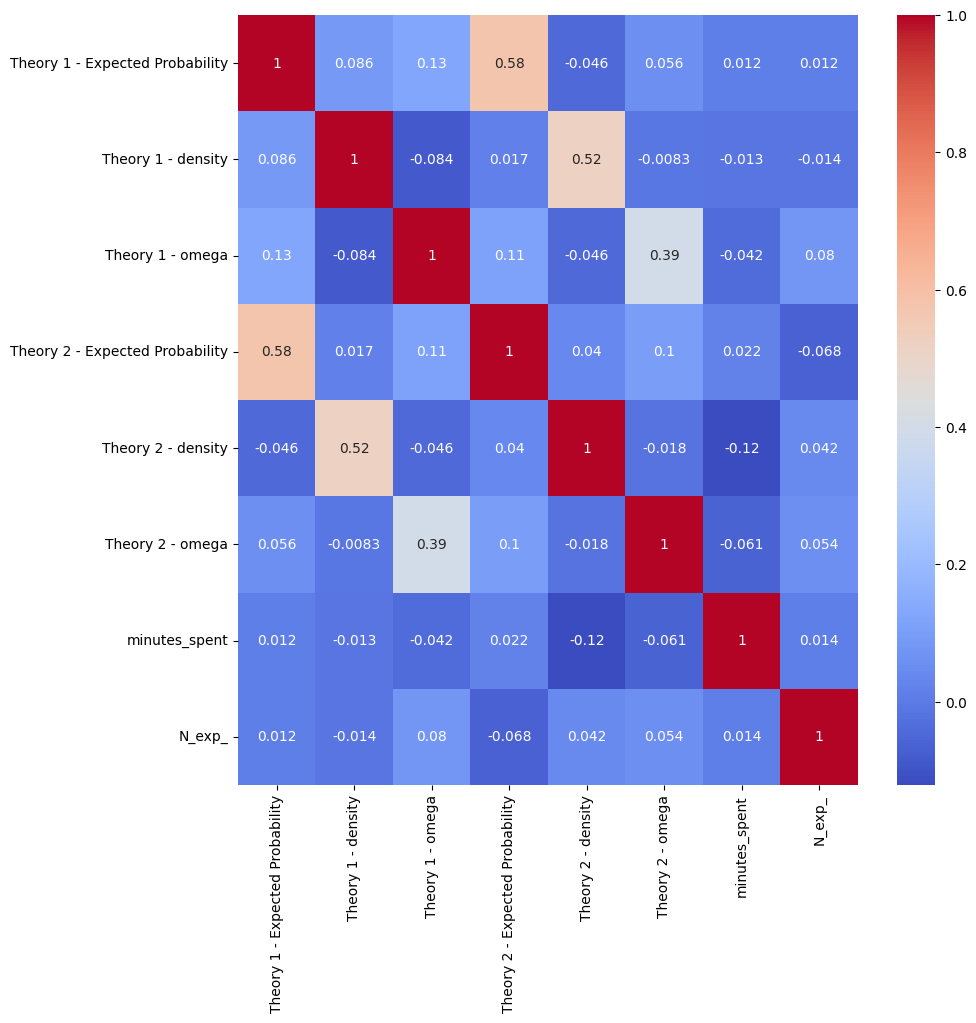

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,
            cmap='coolwarm',
            )



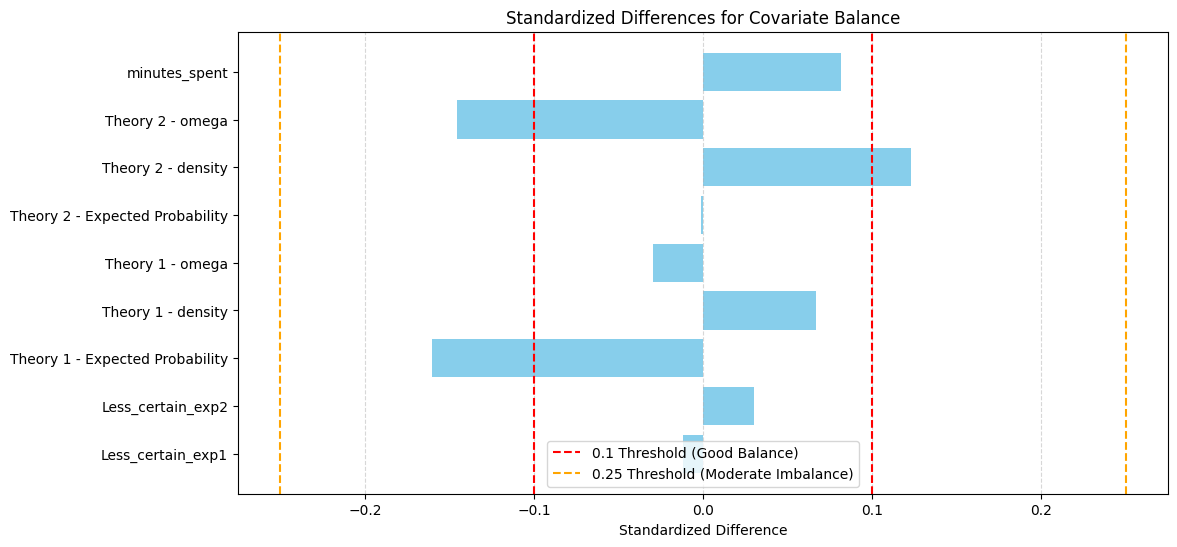

In [1]:
import matplotlib.pyplot as plt

# Data for visualization
standardized_diff = {
    'Less_certain_exp1': -0.011593,
    'Less_certain_exp2': 0.030395,
    'Theory 1 - Expected Probability': -0.160248,
    'Theory 1 - density': 0.067027,
    'Theory 1 - omega': -0.029699,
    'Theory 2 - Expected Probability': -0.001344,
    'Theory 2 - density': 0.122781,
    'Theory 2 - omega': -0.145650,
    'minutes_spent': 0.081555
}

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(list(standardized_diff.keys()), list(standardized_diff.values()), color='skyblue')
plt.axvline(x=0.1, color='red', linestyle='--', label='0.1 Threshold (Good Balance)')
plt.axvline(x=-0.1, color='red', linestyle='--')
plt.axvline(x=0.25, color='orange', linestyle='--', label='0.25 Threshold (Moderate Imbalance)')
plt.axvline(x=-0.25, color='orange', linestyle='--')
plt.xlabel('Standardized Difference')
plt.title('Standardized Differences for Covariate Balance')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression



######### Fit the FIRST logistic regression model
model1 = sm.Logit(Y, X)
result1 = model1.fit()

######## Logistic regression with all covariates from both sets
most_covariates = ['Theory 1 - Expected Probability', 'Theory 1 - density',
                  'Theory 1 - omega', 'Theory 2 - Expected Probability',
                  'Theory 2 - density', 'Theory 2 - omega', 'minutes_spent',
                #   'Less_certain_exp2', 
                  'Less_certain_exp1',
                  # 'Spotify',
                    'Luxottica', 'Red Bull', # 'Booking.com', 'Netflix', 'Google',
                    ]
X_most_covariates = sm.add_constant(games[most_covariates])

# Fit the SECOND logistic regression model with all covariates
model2 = sm.Logit(Y, X_most_covariates)
result2 = model2.fit()

######## Logistic regression with all covariates from both sets
all_covariates = ['Theory 1 - Expected Probability', 'Theory 1 - density',
                  'Theory 1 - omega', 'Theory 2 - Expected Probability',
                  'Theory 2 - density', 'Theory 2 - omega', 'minutes_spent',
                #   'Less_certain_exp2', 
                  'Less_certain_exp1',
                  'Spotify', 'Luxottica', 'Booking.com', 'Netflix', 'Google',
                  'Apple', 'Amazon Web Services', 'Lego', 'Marvel', 'Porsche', 'OpenAI',
                  'Adobe', 'SpaceX', 'PayPal', 'Red Bull',]
X_all_covariates = sm.add_constant(games[all_covariates])

# Fit the THIRD logistic regression model with all covariates
model3 = sm.Logit(Y, X_all_covariates)
result3 = model3.fit()






# VISUALIZATION
# Define a dictionary to include AIC in the summary
def add_aic(res):
    return {'AIC': f"{res.aic:.2f}"}

# Combine the results into one table with asterisks for significance
info_dict = {'N': lambda x: f"{int(x.nobs)}"}
results_table = summary_col([result1, result2, result3], stars=True, model_names=['Model 1', 'Model 2', 'Model 3'],
                            info_dict={
                            'AIC': lambda res: f"{res.aic:.2f}",
                            'BIC': lambda res: f"{res.bic:.2f}"},
                            drop_omitted=['Apple'],
                            float_format='%0.4f')

# Print combined results
print(results_table)





Optimization terminated successfully.
         Current function value: 0.596793
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578050
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.562905
         Iterations 6

                                Model 1   Model 2    Model 3  
--------------------------------------------------------------
const                           0.8913   0.8940     1.7124**  
                                (0.6421) (0.6615)   (0.8193)  
Theory 1 - Expected Probability -1.2189* -0.9221    -1.2169   
                                (0.6957) (0.7230)   (0.7729)  
Theory 1 - density              0.4059   0.2266     -0.6458   
                                (1.6005) (1.6673)   (2.0110)  
Theory 1 - omega                0.3379   0.3334     0.4040    
                                (0.6671) (0.6842)   (0.7119)  
Theory 2 - Expected Probability 0.7444   0.6185     0.6983    


In [34]:
# Remove 'const' for covariate balance calculations
X_columns_for_balance = X_all_covariates.columns.difference(['const'])

# Calculate standardized differences for covariate balance
means_treatment = games[games['result (1 = won)'] == 1][X_columns_for_balance].mean()
means_control = games[games['result (1 = won)'] == 0][X_columns_for_balance].mean()
std_treatment = games[games['result (1 = won)'] == 1][X_columns_for_balance].std()
std_control = games[games['result (1 = won)'] == 0][X_columns_for_balance].std()

standardized_diff = (means_treatment - means_control) / np.sqrt((std_treatment ** 2 + std_control ** 2) / 2)

# Print standardized differences
print("\nStandardized Differences for Covariate Balance:")
print(standardized_diff.sort_values())


Standardized Differences for Covariate Balance:
Luxottica                         -0.283795
Red Bull                          -0.265262
Theory 1 - Expected Probability   -0.160248
Theory 2 - omega                  -0.145650
Lego                              -0.097599
PayPal                            -0.082557
Spotify                           -0.074871
Apple                             -0.037381
Theory 1 - omega                  -0.029699
SpaceX                            -0.012333
Less_certain_exp1                 -0.011593
Theory 2 - Expected Probability   -0.001344
Google                             0.002652
Adobe                              0.005296
Booking.com                        0.031194
Amazon Web Services                0.050143
Theory 1 - density                 0.067027
minutes_spent                      0.081555
Marvel                             0.094742
Theory 2 - density                 0.122781
Netflix                            0.124016
OpenAI                     

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# print(pd.DataFrame(vif_data))


import pandas as pd
from tabulate import tabulate

table = tabulate(vif_data, headers='keys', tablefmt='grid')

# Print the table so you can copy it
print(table)
# if VIF is >5 => multicollinearity

+----+---------------------------------+----------+
|    | Variable                        |      VIF |
+====+=================================+==========+
|  0 | const                           | 32.5531  |
+----+---------------------------------+----------+
|  1 | Theory 1 - Expected Probability |  1.5608  |
+----+---------------------------------+----------+
|  2 | Theory 1 - density              |  1.42597 |
+----+---------------------------------+----------+
|  3 | Theory 1 - omega                |  1.22164 |
+----+---------------------------------+----------+
|  4 | Theory 2 - Expected Probability |  1.53752 |
+----+---------------------------------+----------+
|  5 | Theory 2 - density              |  1.43767 |
+----+---------------------------------+----------+
|  6 | Theory 2 - omega                |  1.19259 |
+----+---------------------------------+----------+
|  7 | minutes_spent                   |  1.05196 |
+----+---------------------------------+----------+
|  8 | Less_